In [156]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import scipy
import mne
import os
import pandas as pd
import numpy as np
import mne
import scipy
import pickle

In [157]:
PATH_TROUGHS = "../../../../Dropbox (Brain Modulation Lab)/Shared Lab Folders/CRCNS/MOVEMENT DATA/SharpWaveAnalysis/"
PATH_PEAKS = "../../../../Dropbox (Brain Modulation Lab)/Shared Lab Folders/CRCNS/MOVEMENT DATA/SharpWaveAnalysis_Peaks/"
PATH_COMBINED = "../../../../Dropbox (Brain Modulation Lab)/Shared Lab Folders/CRCNS/MOVEMENT DATA/Combined_runs/"
PATH_SAVE = "../../../../Dropbox (Brain Modulation Lab)/Shared Lab Folders/CRCNS/MOVEMENT DATA/SharpWaveAnalysis/preprocessed/"
subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']

In [158]:
dict_metrics_TROUGH = {"sharpness":"mV", 
                "trough":"mV",
                "interval":"ms",
                "prominence":"mV",
                "rise_steepness":"mV'",
                "rise_time":"ms", 
                "decay_steepness":"mV'",
                "slope_ratio":"mV'",
                "decay_time":"ms",
                "width":"ms"}

dict_metrics_PEAK = {"sharpness":"mV", 
                "peak":"mV",
                "interval":"ms",
                "prominence":"mV",
                "rise_steepness":"mV'",
                "rise_time":"ms", 
                "decay_steepness":"mV'",
                "slope_ratio":"mV'",
                "decay_time":"ms",
                "width":"ms"}


def plot_mov_sep_hist(metric, label):
    sn.distplot(df[df.MOV_TYPE.str.contains("NONE")][metric], label='None', color='black')
    sn.distplot(df[df.MOV_TYPE.str.contains("CON")][metric], label='CON', color='red')
    sn.distplot(df[df.MOV_TYPE.str.contains("IPS")][metric], label='IPS', color='blue')
    plt.title(metric)
    plt.xlabel(metric + " [" + label+"]")
    plt.legend()
    
def plot_hist_comp(metric, metric_unit, df):
    p = np.array(df[df.MOV_TYPE.str.contains("NO_MOV")][metric])
    q_con = np.array(df[df.MOV_TYPE.str.contains("CON")][metric])
    q_ips = np.array(df[df.MOV_TYPE.str.contains("IPS")][metric])

    range_ = [np.min(np.concatenate([q_con, q_ips, p])), np.max(np.concatenate([q_con, q_ips, p]))]
    p_, x, _ = plt.hist(p, density=True, bins=50, range=range_, alpha=0.3, color="black")
    q_con_ = plt.hist(q_con, density=True, bins=50, range=range_, alpha=0.3, color="r")[0]
    # for Dkl replace zero elements with e-9
    Dkl_con = np.round(scipy.stats.entropy(np.where(p_ == 0.0, 1e-9, p_), np.where(q_con_ == 0.0, 1e-9, q_con_)), 2)
    
    # adapt this measure 
    
    q_ips_ = plt.hist(q_ips, density=True, bins=50, range=range_, alpha=0.3, color="b")[0]
    Dkl_ips = np.round(scipy.stats.entropy(np.where(p_ == 0.0, 1e-9, p_), np.where(q_ips_ == 0.0, 1e-9, q_ips_)), 2)


    density_p = scipy.stats.gaussian_kde(p)
    density_q_con = scipy.stats.gaussian_kde(q_con)
    density_q_ips = scipy.stats.gaussian_kde(q_ips)
    plt.plot(x, density_p(x), c="black", label='NO_MOV')
    plt.plot(x, density_q_con(x), c="r", label='CON')
    plt.plot(x, density_q_ips(x), c="b", label='IPS')
    plt.legend()

    plt.title("Dkl_con = " + str(Dkl_con)+ "\nDkl_ips = "+ str(Dkl_ips))
    plt.xlabel(metric + " ["+ metric_unit+"]")
    return Dkl_con, Dkl_ips

def get_sharpness_ratio(df_PEAKS, df_TROUGHS, MOV_TYPE):
    df_PEAKS_ = df_PEAKS[df_PEAKS.MOV_TYPE == MOV_TYPE]
    df_TROUGHS_ = df_TROUGHS[df_TROUGHS.MOV_TYPE == MOV_TYPE]
    
    sharpness_tr = np.sum(df_TROUGHS_["sharpness"]) / df_TROUGHS_["sharpness"].shape[0]
    sharpness_pe = np.sum(df_PEAKS_["sharpness"]) / df_PEAKS_["sharpness"].shape[0]
    sharpness_ratio = np.max([sharpness_pe/sharpness_tr, sharpness_tr/sharpness_pe])
    
    return sharpness_ratio
    

In [159]:
files_TROUGHS = os.listdir(PATH_TROUGHS)
files_PEAKS = os.listdir(PATH_PEAKS)
df = np.load(os.path.join(PATH_, files_[0]), allow_pickle=True)

In [160]:
files_PEAKS

['sub_005_ch_ECOG_LEFT_3.p',
 'sub_002_ch_ECOG_RIGHT_0.p',
 'sub_010_ch_ECOG_LEFT_4.p',
 'sub_004_ch_STN_LEFT_1.p',
 'sub_006_ch_ECOG_RIGHT_21.p',
 'sub_005_ch_ECOG_RIGHT_7.p',
 'sub_004_ch_ECOG_LEFT_0.p',
 'sub_006_ch_ECOG_LEFT_21.p',
 'sub_013_ch_ECOG_LEFT_1.p',
 'sub_006_ch_ECOG_LEFT_6.p',
 'sub_000_ch_ECOG_RIGHT_3.p',
 'sub_001_ch_ECOG_RIGHT_27.p',
 'sub_010_ch_STN_RIGHT_1.p',
 'sub_006_ch_STN_LEFT_0.p',
 'sub_007_ch_ECOG_LEFT_5.p',
 'sub_001_ch_ECOG_LEFT_26.p',
 'sub_012_ch_ECOG_LEFT_2.p',
 'sub_006_ch_ECOG_LEFT_8.p',
 'sub_005_ch_STN_RIGHT_2.p',
 'sub_001_ch_ECOG_LEFT_22.p',
 'sub_007_ch_ECOG_LEFT_1.p',
 'sub_006_ch_ECOG_LEFT_2.p',
 'sub_014_ch_ECOG_RIGHT_2.p',
 'sub_006_ch_ECOG_LEFT_25.p',
 'sub_013_ch_ECOG_LEFT_5.p',
 'sub_009_ch_STN_LEFT_0.p',
 'sub_001_ch_ECOG_RIGHT_23.p',
 'sub_004_ch_STN_RIGHT_1.p',
 'sub_010_ch_STN_LEFT_0.p',
 'sub_006_ch_ECOG_RIGHT_25.p',
 'sub_004_ch_ECOG_LEFT_4.p',
 'sub_005_ch_ECOG_RIGHT_3.p',
 'sub_011_ch_ECOG_LEFT_3.p',
 'sub_010_ch_ECOG_LEFT_0.p',
 

In [161]:
df.keys()

Index(['MOV_TYPE', 'decay_steepness', 'decay_time', 'interval', 'label',
       'peak_idx_left', 'peak_idx_right', 'peak_left', 'peak_right',
       'prominence', 'rise_steepness', 'rise_time', 'sharpness', 'slope_ratio',
       'trough', 'trough_idx', 'width', 'y_contra', 'y_ipsi'],
      dtype='object')

In [162]:
# important here: run through all peaks and troughs, estimale the Dkl for every measure 
# get the coordinates, save the DKL parameters for con and ips, plot them
# repeat the same for peaks, estimate the sharpness_ratio 

In [163]:
subjects = ['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015']

sub_000_ch_ECOG_RIGHT_0.p
TROUGHS


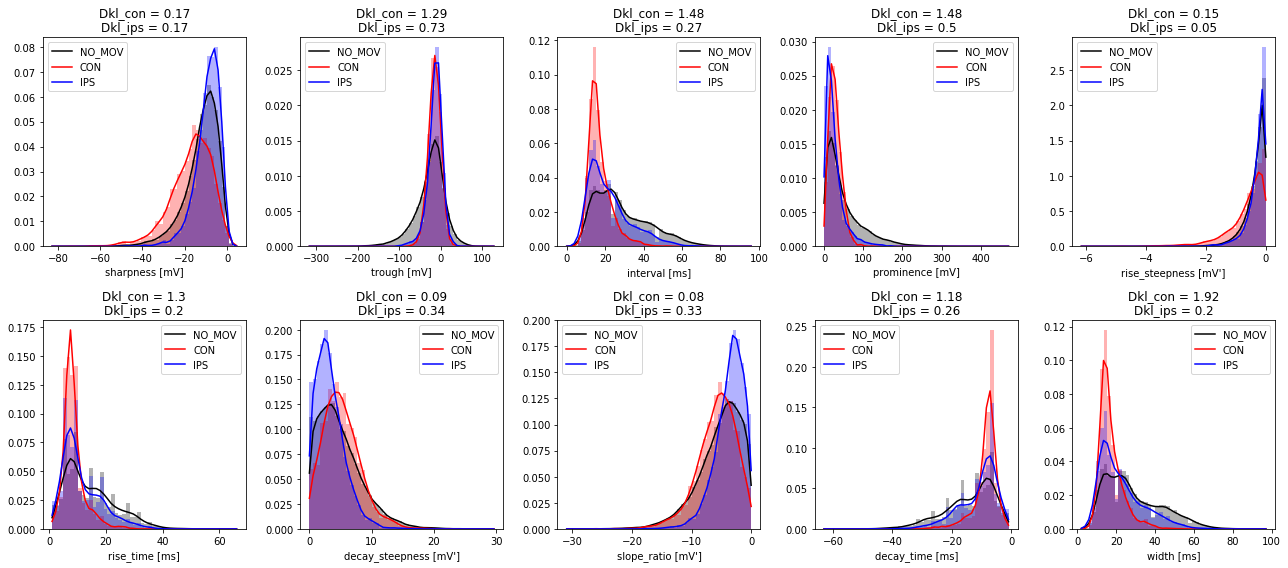

PEAKS


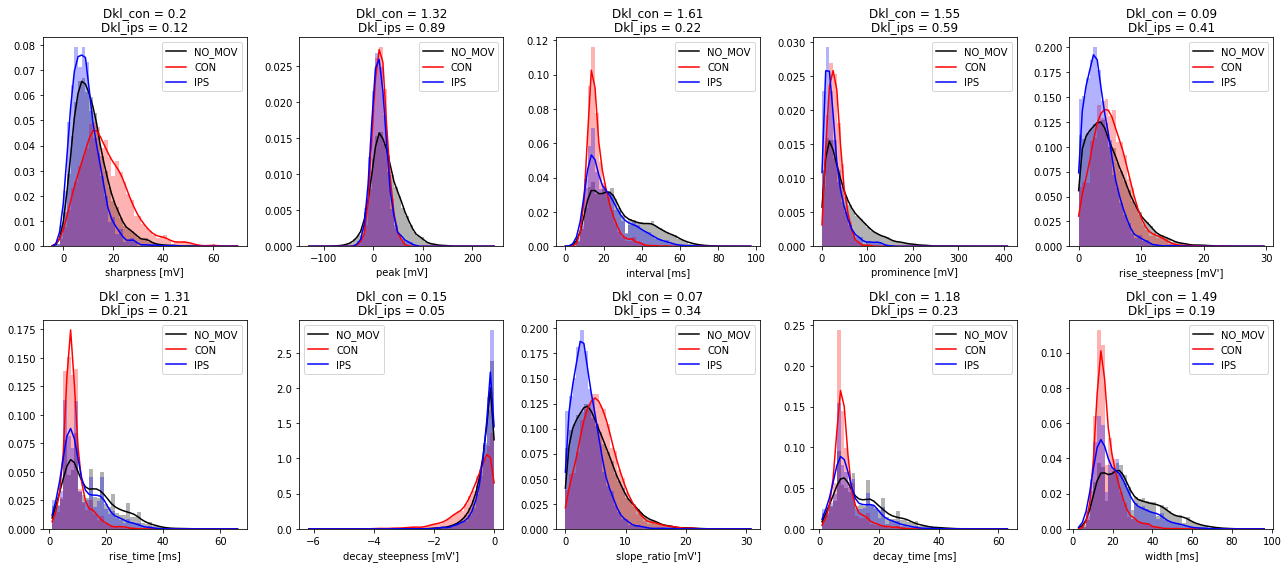

sub_000_ch_ECOG_RIGHT_1.p
TROUGHS


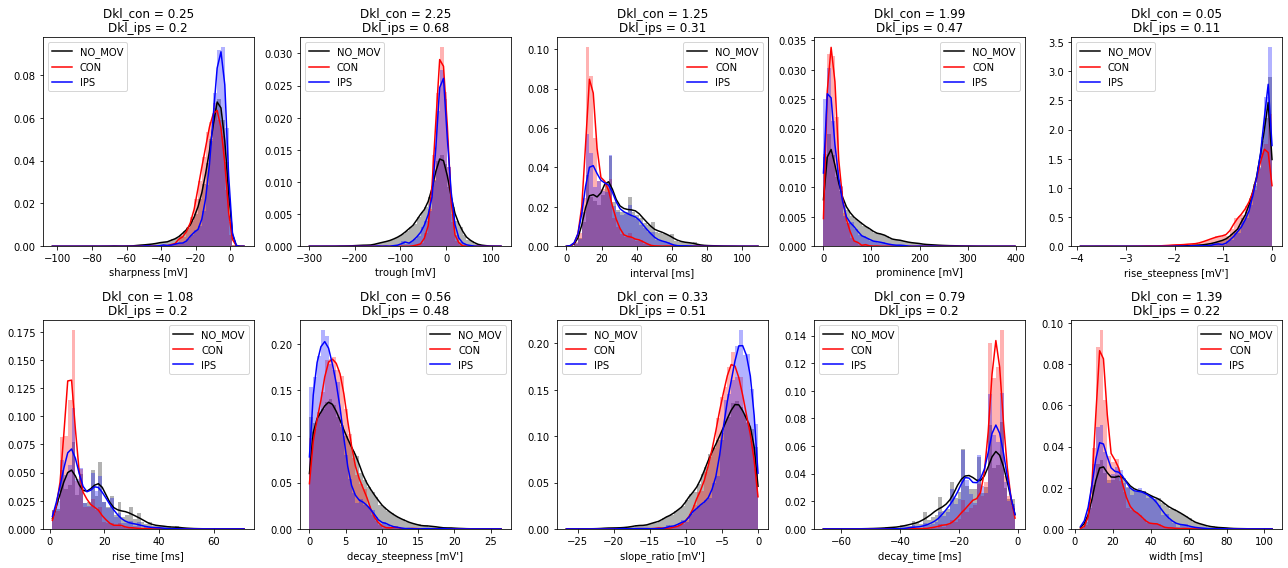

PEAKS


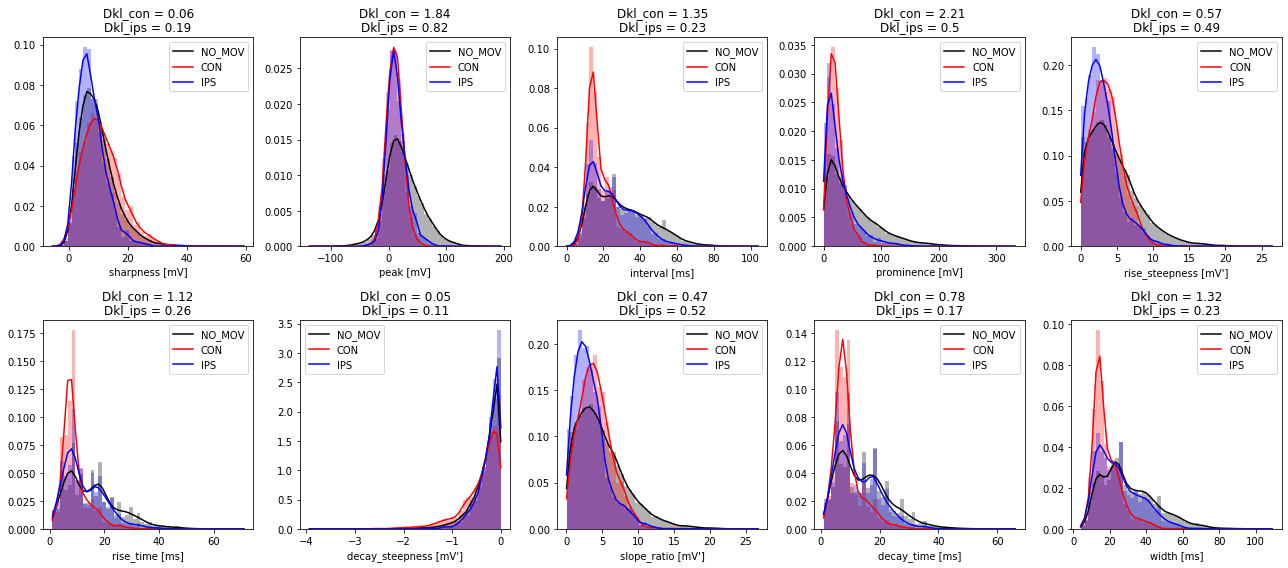

sub_000_ch_ECOG_RIGHT_2.p
TROUGHS


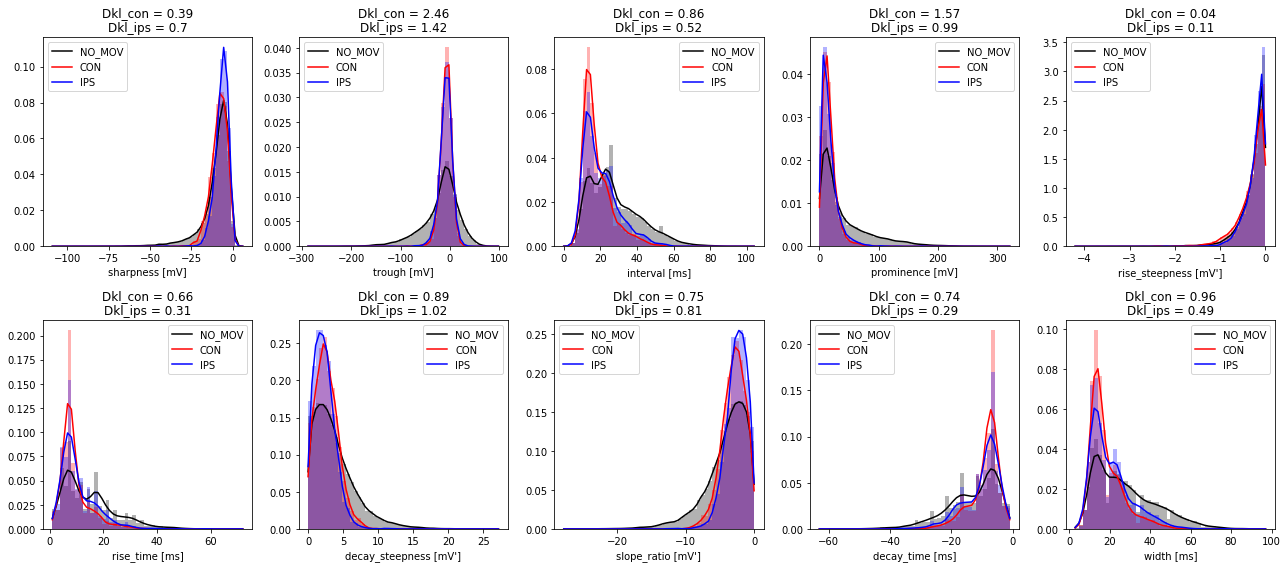

PEAKS


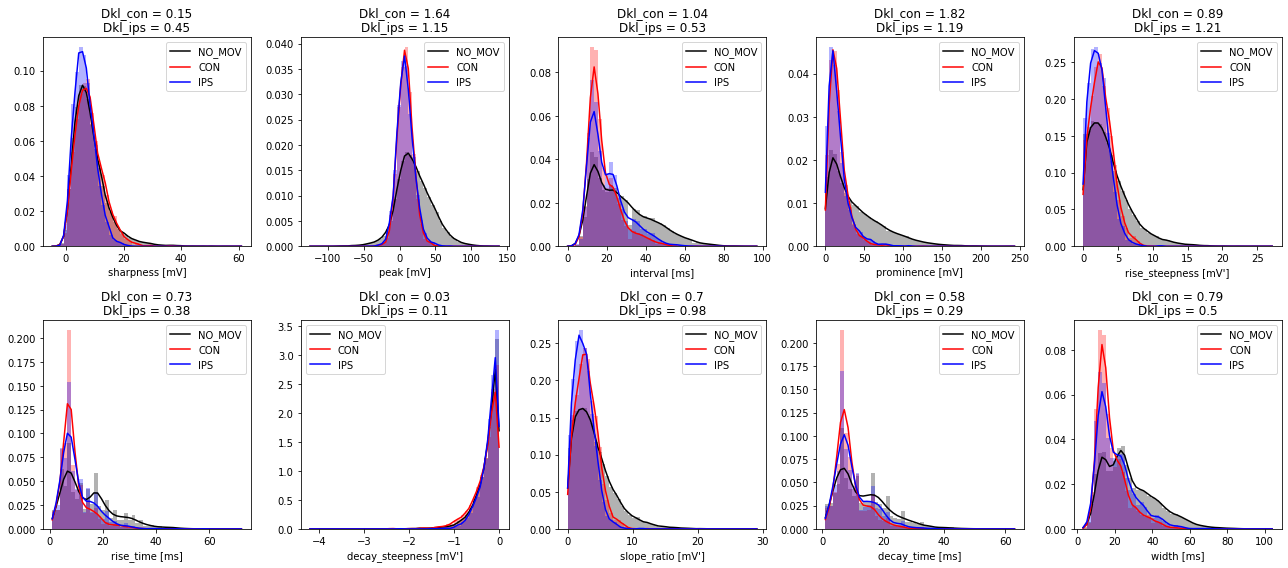

sub_000_ch_ECOG_RIGHT_3.p
TROUGHS


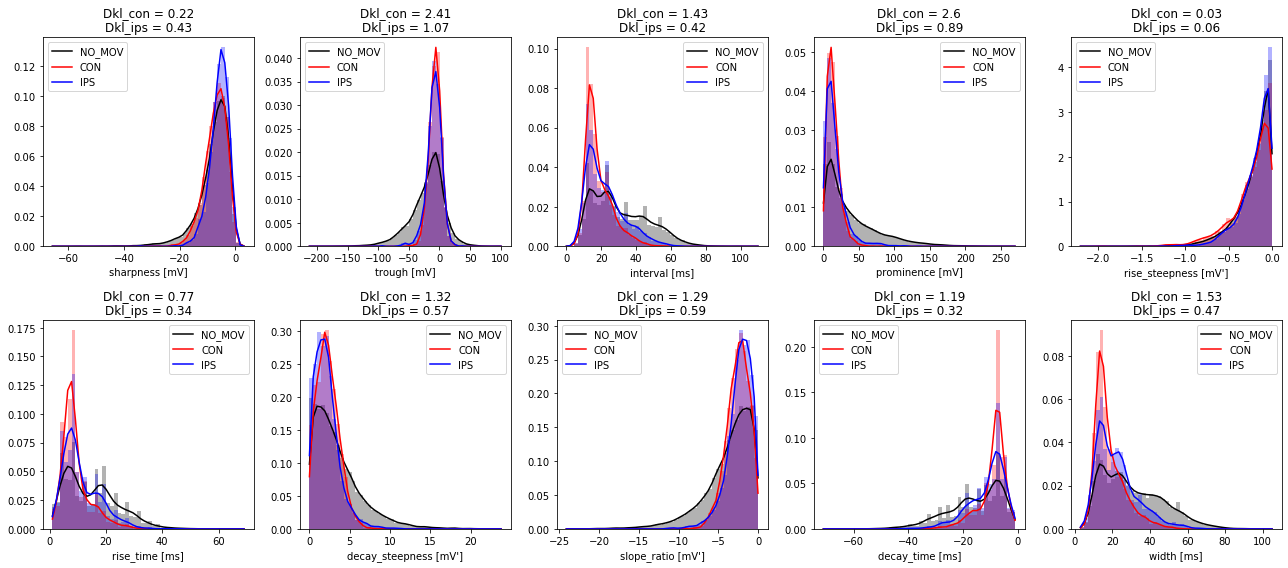

PEAKS


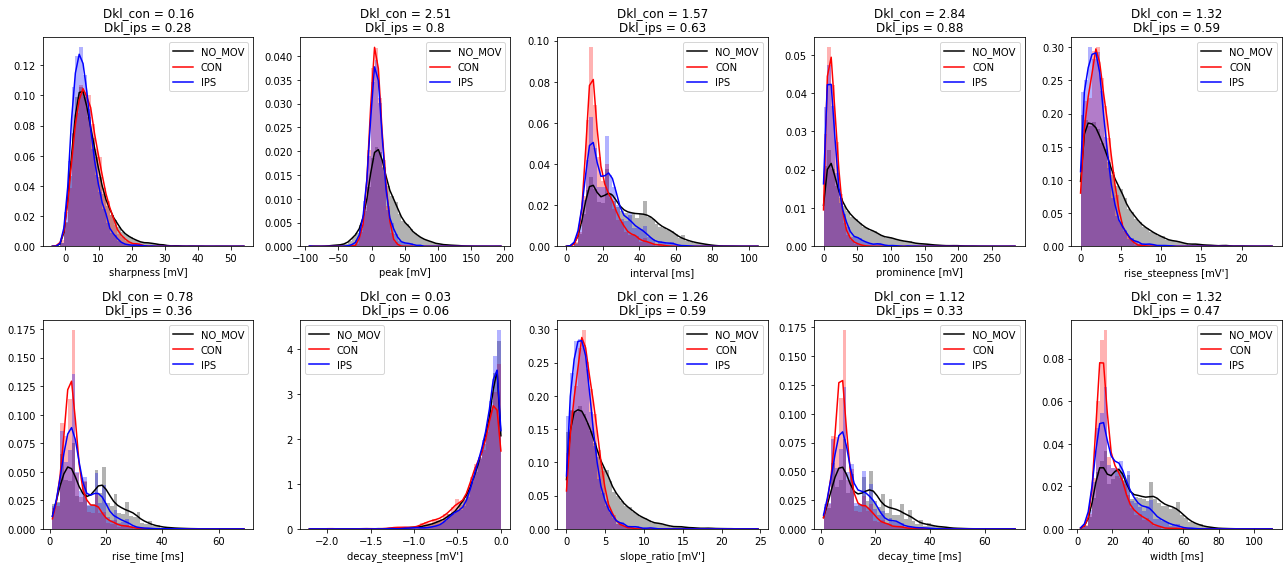

sub_000_ch_ECOG_RIGHT_4.p
TROUGHS


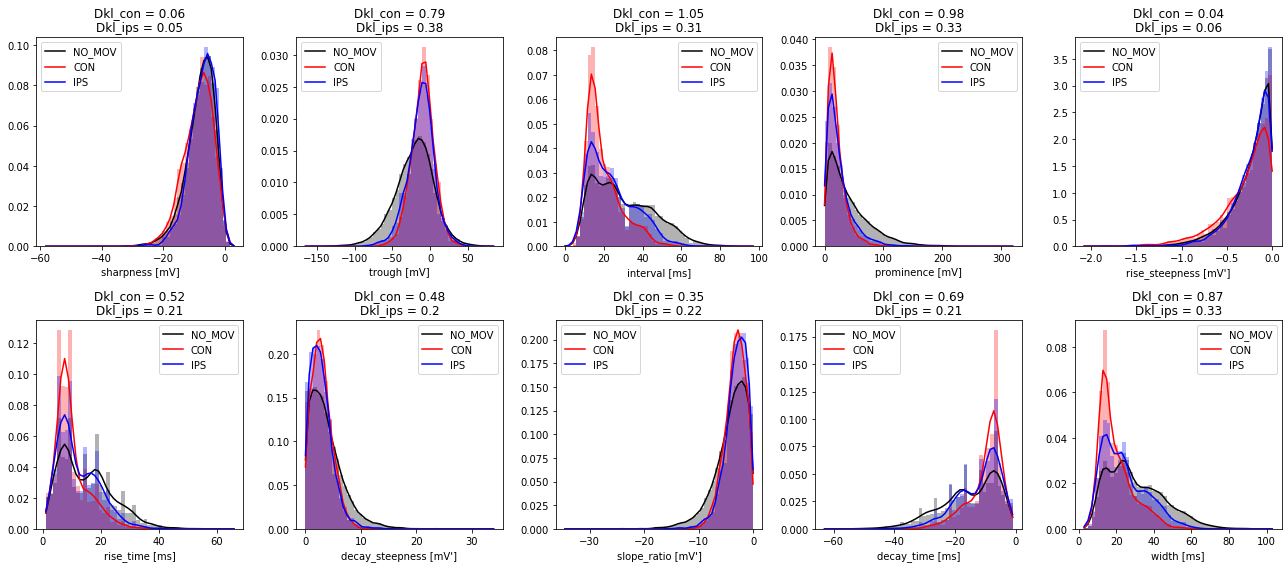

PEAKS


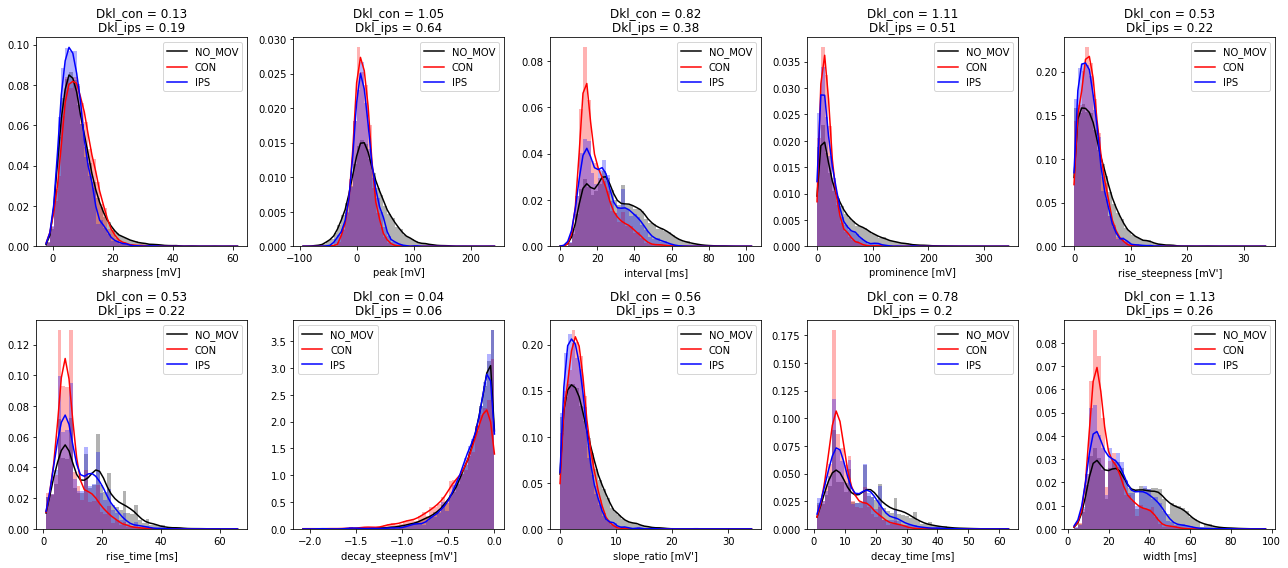

sub_000_ch_ECOG_RIGHT_5.p
TROUGHS


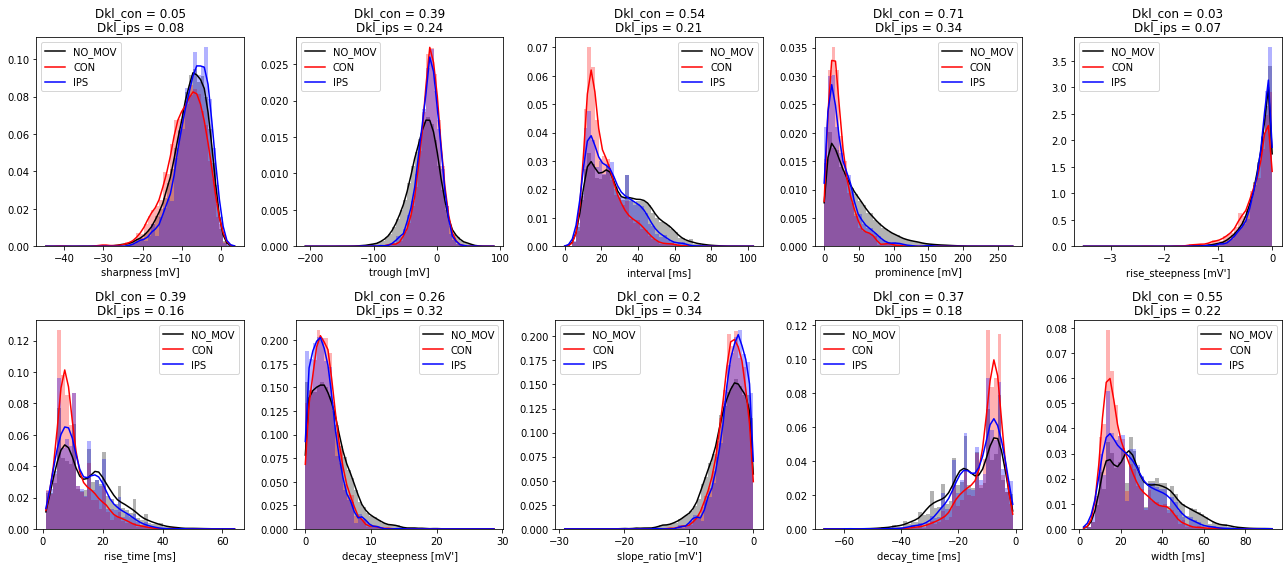

PEAKS


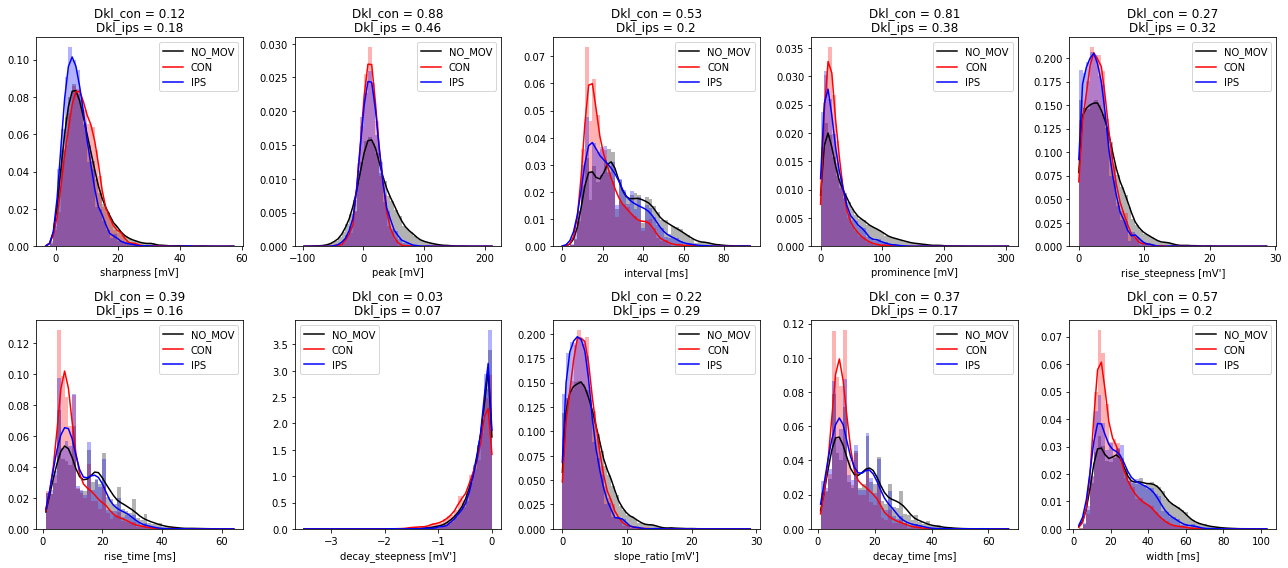

sub_000_ch_STN_RIGHT_0.p
TROUGHS


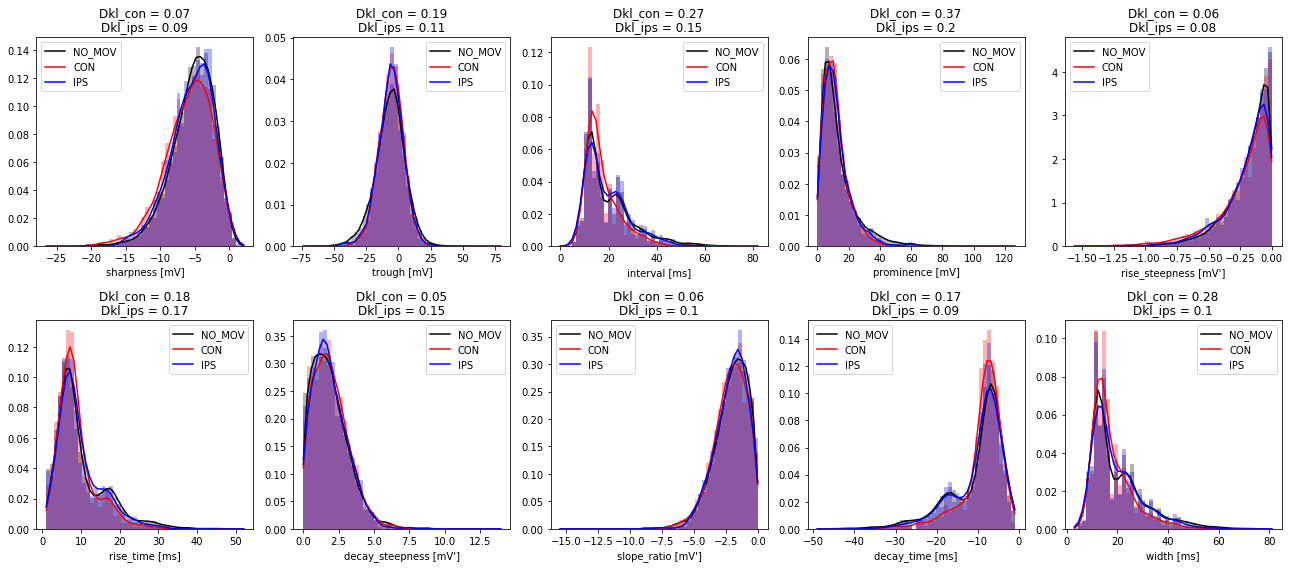

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fae0856f710> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fae085ff0e0> (for post_execute):


KeyboardInterrupt: 

In [172]:
d_ALL = {}
for sub in subjects:
    res = np.load(os.path.join(PATH_COMBINED, [f for f in files_combined if sub in f][0]), allow_pickle=True)
    for loc in ["ECOG", "STN"]:
        files = np.sort(np.array([f for f in files_ if loc in f and sub in f]))
        for f in files:
            
            #try:
            d_ch = {}
            ch_ = f[11:-2] # 'sub_000_ch_STN_RIGHT_2.p'
            #if os.path.exists(os.path.join(PATH_SAVE, sub+'_'+ch_+'.p')):
            #    continue
            df_TROUGHS = np.load(os.path.join(PATH_TROUGHS, f), allow_pickle=True)
            df_PEAKS = np.load(os.path.join(PATH_PEAKS, f), allow_pickle=True)

            print(f)


            for idx_df, df_used in enumerate([df_TROUGHS, df_PEAKS]):
                df_CON = {}; df_IPS = {}
                if idx_df == 0:
                    dict_metrics = dict_metrics_TROUGH
                else:
                    dict_metrics = dict_metrics_PEAK
                fig = plt.figure(figsize=(18,8))
                for idx, metric in enumerate(dict_metrics.items()):
                    plt.subplot(2, 5, idx+1)
                    dkl_con, dkl_ips = plot_hist_comp(metric[0], metric[1], df_used)
                    #dkl_con, dkl_ips = plot_hist_comp(metric[0], metric[1], df_used)
                    df_CON[metric] = dkl_con
                    df_IPS[metric] = dkl_ips
                if idx_df == 0:
                    print("TROUGHS")
                    d_ch["TROUGHS_CON"] = df_CON
                    d_ch["TROUGHS_IPS"] = df_IPS
                else:
                    print("PEAKS")
                    d_ch["PEAKS_CON"] = df_CON
                    d_ch["PEAKS_IPS"] = df_IPS
                plt.tight_layout()
                plt.show()

            sharpness_ratio_CON = get_sharpness_ratio(df_PEAKS, df_TROUGHS, MOV_TYPE="CON")
            sharpness_ratio_IPS = get_sharpness_ratio(df_PEAKS, df_TROUGHS, MOV_TYPE="IPS")
            sharpness_ratio_NO_MOV = get_sharpness_ratio(df_PEAKS, df_TROUGHS, MOV_TYPE="NO_MOV")

            d_ch["sharpness_ratio_CON"] = sharpness_ratio_CON
            d_ch["sharpness_ratio_IPS"] = sharpness_ratio_IPS
            d_ch["sharpness_ratio_NO_MOV"] = sharpness_ratio_NO_MOV

            d_ch["TROUGHS_COUNT_NO_MOV"] = df_TROUGHS[df_TROUGHS.MOV_TYPE == "NO_MOV"].count()[0]
            d_ch["TROUGHS_COUNT_CON"] = df_TROUGHS[df_TROUGHS.MOV_TYPE == "CON"].count()[0]
            d_ch["TROUGHS_COUNT_IPS"] = df_TROUGHS[df_TROUGHS.MOV_TYPE == "IPS"].count()[0]
            d_ch["TROUGHS_ratio_CON"] = d_ch["TROUGHS_COUNT_CON"] / d_ch["TROUGHS_COUNT_NO_MOV"]
            d_ch["TROUGHS_ratio_IPS"] = d_ch["TROUGHS_COUNT_IPS"] / d_ch["TROUGHS_COUNT_NO_MOV"]

            d_ch["PEAKS_COUNT_NO_MOV"] = df_PEAKS[df_PEAKS.MOV_TYPE == "NO_MOV"].count()[0]
            d_ch["PEAKS_COUNT_CON"] = df_PEAKS[df_PEAKS.MOV_TYPE == "CON"].count()[0]
            d_ch["PEAKS_COUNT_IPS"] = df_PEAKS[df_PEAKS.MOV_TYPE == "IPS"].count()[0]
            d_ch["PEAKS_ratio_CON"] = d_ch["PEAKS_COUNT_CON"] / d_ch["PEAKS_COUNT_NO_MOV"]
            d_ch["PEAKS_ratio_IPS"] = d_ch["PEAKS_COUNT_IPS"] / d_ch["PEAKS_COUNT_NO_MOV"]

            d_ch["coords"] = res[ch_]["coords"]
            d_ch["ratio_con_all"] = np.where(res[ch_]["mov_con"]>0)[0].shape[0] / \
                    np.where((res[ch_]["mov_con"]==0) & (res[ch_]["mov_ips"]==0))[0].shape[0]
            d_ch["ratio_ips_all"] = np.where(res[ch_]["mov_ips"]>0)[0].shape[0] / \
                    np.where((res[ch_]["mov_ips"]==0) & (res[ch_]["mov_ips"]==0))[0].shape[0]


            with open(os.path.join(PATH_SAVE, sub+'_'+ch_+'.p'), 'wb') as f:
                pickle.dump(d_ch, f, pickle.HIGHEST_PROTOCOL)

            d_ALL[ch] = d_ch
            #except:
            #    print("CANNOT EVALUATE: ")
            #    print(f)